<h3>In deze notebook gaan we verschillende dingen doen met de Fitbit dataset die we hebben gekregen van de docenten.</h3>
<h3>Ik zal verschillende stappen tussendoor uitleggen en proberen een conclusie te trekken uit de dataset.</h3>

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h3> Laat de datasets</h3>

In [18]:
df_survey = pd.read_csv("survey.csv")
df_survey.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


<h3> We moeten de seperator parameter veranderen naar ; omdat het bestand niet , verdeelt is.</h3>

In [19]:
df_steps = pd.read_csv("steps.csv", sep=";")
df_steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3> Merge de twee datasets op "id"</h3>

In [20]:
df = pd.merge(df_steps, df_survey, on = "id")
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


<h3> vul alle NaN velden met 0,
verweider onmogelijke waardes in "weight",
Haal alle NaN weg</h3>

In [21]:
df = df.fillna(0)
def remove_impossible_values(x):
    if(x <= 40 or x >= 200): 
        return float("NaN")
    else: 
        return x
df["weight"] = df["weight"].apply(remove_impossible_values)
df.dropna()

print(df["weight"].max())
print(df["weight"].min())

155.0
45.0


<h3> Maak variable variable mean_steps</h3>

In [22]:
col = df.loc[: , "20-6-2013":"13-5-2014"]
df["mean_steps"] = col.mean(axis=1)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean_steps
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,5133.875000
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,2826.371951
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,3745.902439
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,221.536585
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,874.557927


In [23]:
def remove_impossible_mean_steps(x):
    if(x <= 100 or x >= 15000): 
        return float("NaN")
    else: 
        return x
df["mean_steps"] = df["mean_steps"].apply(remove_impossible_mean_steps)
df.dropna()

print(df["mean_steps"].max())
print(df["mean_steps"].min())

14538.682926829268
100.28658536585365


In [24]:
def remove_impossible_mean_steps(x):
    if(x <= 100 or x >= 15000): 
        return float("NaN")
    else: 
        return x
df["mean_steps"] = df["mean_steps"].apply(remove_impossible_mean_steps)
df = df.dropna()

print(df["mean_steps"].max())
print(df["mean_steps"].min())

14538.682926829268
100.28658536585365


<h3> Plot de mean_steps</h3>

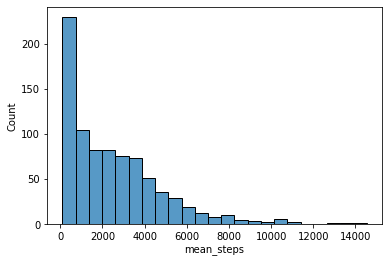

In [25]:
sns.histplot(df["mean_steps"])
plt.show()

<h3>De Distribution is is erg aan de linker kant met de laagste waardes omdat deze het meest voor komen.</h3>
<h3>Ook is te zien dat er toch nog een paar heftige uitschieters hebben. Dit zijn geen onmogelijke getallen zoals bij gewicht. Dit kunnen mensen zijn die een super achtief leven hebben.</h3>
<h3>De data is ook Right Skewed omdat de Mean hoger ligt dan Median</h3>

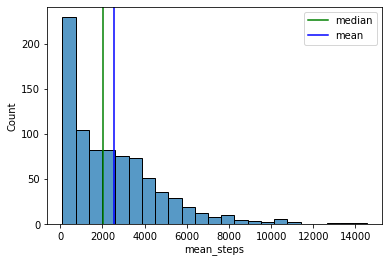

In [26]:
sns.histplot(df["mean_steps"], kde=False)
plt.axvline(df["mean_steps"].median(), 0, 100, color="green", label="median")
plt.axvline(df["mean_steps"].mean(), 0, 100, color="blue", label="mean") 
plt.legend()
plt.show()

<h3>Wat interesant is is dat mensen onder de 25 het minste stappen zetten na 65+</h3>
<h3>Mensen tussen de 55 en 64 lopen het meest. Waarbij vrouwen ook nog eens een stuk meer stappen zetten dan mannen.</h3>
<h3>Ook hier zie je alleen een paar uitschieters zoals zoals dus de vrouwen van 55-64 en vrouwen 65+.</h3>

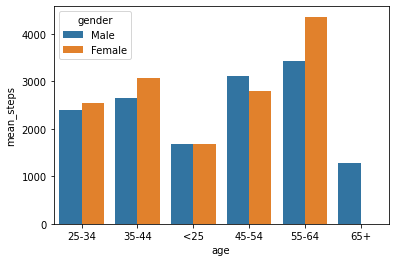

In [27]:
ax = sns.barplot(x=df["age"], y=df["mean_steps"], hue=df["gender"], errorbar=None)